In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### We are trying to predict whether a passenger on the titanic survived or not. So, it's a classification problem.

In [2]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Now, let's check for the null values in the columns

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Let's visualize this using seaborn

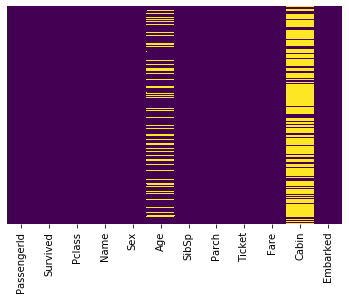

In [7]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [8]:
sns.set_style('whitegrid')

In [9]:
# Let's check the number of passengers survived and number of passengers dieda

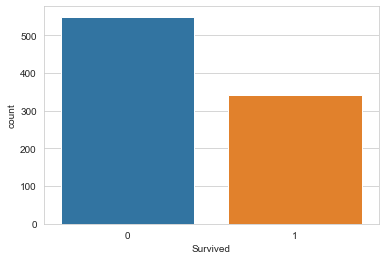

In [10]:
sns.countplot(x=train['Survived'])

In [11]:
# Now, we will see how many males and females have survived on titanic

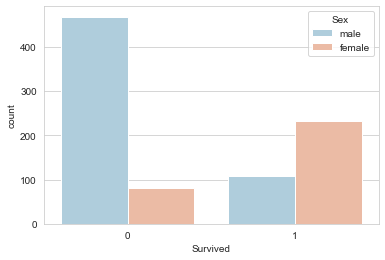

In [12]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

In [13]:
# Let's see the number of passengers survived and died based on their Passenger Class

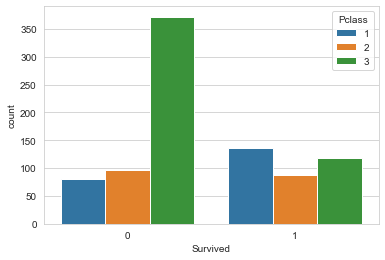

In [14]:
sns.countplot(x='Survived',hue='Pclass',data=train)

In [15]:
# Now, let's have a look at the age of the passengers who were onboard

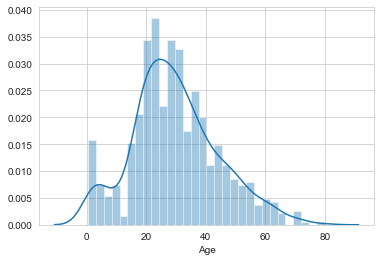

In [16]:
sns.distplot(train['Age'].dropna(),bins=30)

In [17]:
# Checking the number of passengers having any Sibling or Spouse on titanic

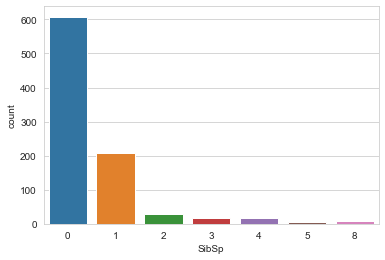

In [18]:
sns.countplot(x='SibSp',data=train)

In [19]:
# Let's check the distribution of fare

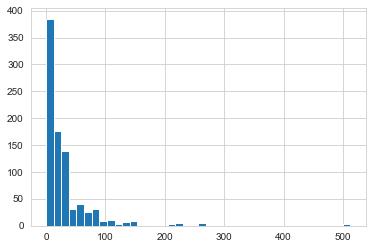

In [20]:
plt.hist(train['Fare'],bins=40)
plt.show()

In [21]:
# It shows that most of the passengers were having cheaper ticket price since most of them belonged to Pclass 3

In [22]:
# We can aslo make this plot interactive using Cufflinks as shown below:

In [23]:
import cufflinks as cf
cf.go_offline()

In [24]:
train['Fare'].iplot(kind='hist')

In [25]:
# Let's impute the null values in the Age column

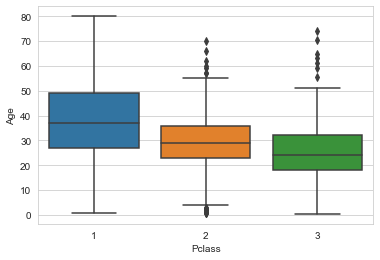

In [26]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [27]:
def impute_age(df):
    
    for index, row in df.iterrows():
        if row['Age'] == np.nan:
            if row['Pclass'] == 1:
                return df[df['Pclass'] == 1]['Age'].mean()
            elif row['Pclass'] == 2:
                return df[df['Pclass'] == 2]['Age'].mean()
            elif row['Pclass'] == 3:
                return df[df['Pclass'] == 3]['Age'].mean()
        else:
            return row['Age']

In [28]:
train['Age'] = impute_age(train)

In [29]:
train['Age'].isnull().sum()

0

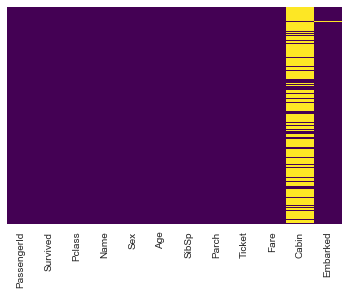

In [30]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [31]:
train['Cabin'].isnull().sum()

687

In [32]:
# Let's drop the Cabin column
train.drop('Cabin',axis=1,inplace=True)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,22.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,22.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,22.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,22.0,0,0,373450,8.0500,S


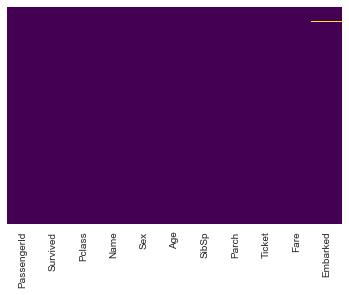

In [34]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [35]:
# Let's just drop the remaining rows which have missing values
train.dropna(inplace=True)

In [36]:
# Now, we will create dummy variables for categorical features Sex and Embarked

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [38]:
# Dropping irrelevant columns before applying get dummies
train.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [39]:
train = pd.get_dummies(train, columns=['Sex','Embarked','Pclass'], drop_first=True)
train.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,22.0,1,0,71.2833,0,0,0,0,0
2,1,22.0,0,0,7.9250,0,0,1,0,1
3,1,22.0,1,0,53.1000,0,0,1,0,0
4,0,22.0,0,0,8.0500,1,0,1,0,1


### Train and Test Split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

### Training & Predicting

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
y_predicted = logreg.predict(X_test)

### Performance Metrics

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
print(confusion_matrix(y_test,y_predicted))

[[143  24]
 [ 28  72]]


In [48]:
print('Recall =',80/(80+26)*100,'%')

Recall = 75.47169811320755 %


In [49]:
print('Precision =',80/(80+26)*100,'%')

Precision = 75.47169811320755 %


In [50]:
print('Accuracy =',(135+80)/(135+80+26+26)*100,'%')

Accuracy = 80.52434456928839 %
